# How the Price of a Risk Asset Correlates to Flow-of Funds
During a four month period data was collected on the price and capitalizatoin of buy and sell orders in a risk asset, the cryptocurrency, Avalanche (AVAXUSD). 

The data represents four months of daily data collection, where each day's activity maps to one csv file. Inside each file are a minimum of 1,000 lines, written during the course of the trading day. These rows represent a snapshot of the market, as it pertains to all buy and sell orders, the prices they specify, and the volume per order-at-price. The sum of price multiplied by volume delivers the capitalization statistic, which is tabulated per buy and sell type of order into two statistics: 

AC: ask capitalization 
BC: buy capitalization

In the system we implement, data is usually sampled every five seconds. A tabulated AC and BC number is thus delivered per row, at minimum 1,000 times per day. 

The midpoint of the order book is the settled price. Thus, the column, MP is the midpoint. The collection of data every five seconds, with corresponding ask and bid quantities, is associated with the price, at that moment. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date 
!pip install altair

     |████████████████████████████████| 819kB 34.9MB/s eta 0:00:01


In [2]:
import altair as alt

## Create one dataframe for all days in the study
Iterate the lob_caps directory, for each item inside, create one dataframe, then concat this file's dataframe with all prior dataframes. Make a global dataframe, representing all order book data. 

In [3]:
import os

#https://stackoverflow.com/a/21232849 model 
def getCAPSByDateAndType(type):  #returns a dict, date + df caps for that date, then extended date and time
                                # print("for type, ", type)
    ret = []
    for root, dirs, files in os.walk("./lob_caps/"):
        for filename in files:
            if type in filename:
                # print("CAPS file, ", filename)
                ret.append(filename)
    return ret

csvFileList = getCAPSByDateAndType("CAPS") #iterate this array to dip into each csv, later on
li = []                         #form the endFrame / global data frame around this array
for filename in csvFileList:
    csv = "lob_caps/" + filename
    # print(csv)
    df = pd.read_csv(csv, index_col=None, header=0)
    li.append(df)

endFrame = pd.concat(li, axis=0, ignore_index=True) #end frame contains all data
endFrame.sort_values(by=['time'], ascending=True)   #sorted by time into one time series
print("for new df: ", endFrame.shape[0])
start = endFrame["time"].min()
end = endFrame["time"].max()
print("start: ", start, " end: ", end)
print(endFrame.columns)

for new df:  111336
start:  1660221600292  end:  1671726692823
Index(['bc', 'ac', 'tbv', 'tav', 'time', 'mp', 'minBid'], dtype='object')


# What happens to price, given the inflow of money into buy orders?
Markets experience an inflow of capital, in the form of orders. This flow is known as capitalization, where a type of order is 'capitalized', or requested by a participant. These orders are both sales and purchases (or bids and asks). 

In this chart I studied the linear time series of capitalization as a factor in the price of the asset. Buy flows are charted against the price of the asset, for potential associations. 

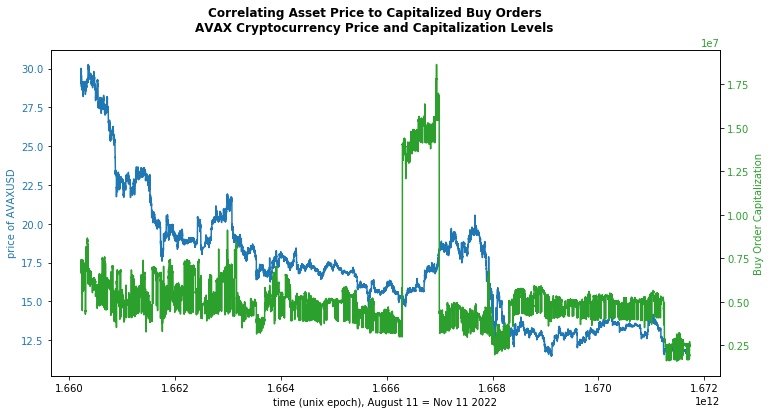

In [4]:
c = ['time', 'mp', 'bc']
gb =endFrame[c].sort_values(by=['time'])
t = gb['time']
data1 = gb['mp']
data2 = gb['bc']
   
fig, ax1 = plt.subplots()
   
color = 'tab:blue'
ax1.set_xlabel('time (unix epoch), August 11 = Nov 11 2022')
ax1.set_ylabel('price of AVAXUSD', color = color)
ax1.plot(t, data1, color = color)
ax1.tick_params(axis ='y', labelcolor = color)
   
ax2 = ax1.twinx()
   
color = 'tab:green'
ax2.set_ylabel('Buy Order Capitalization', color = color)
ax2.plot(t, data2, color = color)
ax2.tick_params(axis ='y', labelcolor = color)
  
fig.suptitle('Correlating Asset Price to Capitalized Buy Orders\n\
AVAX Cryptocurrency Price and Capitalization Levels\n', fontweight ="bold")
fig.set_figwidth(12)
fig.set_figheight(6)
plt.show()

# What happens to price, given the inflow of money into sell orders?

Capitalization (of inflows) of sell orders are charted, below. 

The graph is asking the question, what happens to the price of an asset, during the inflow of money into sell orders? Below I follow up with a correlation coeficient. 

This visualization is possible directly after importing all daily order book files, and concatenating them into one dataframe. 

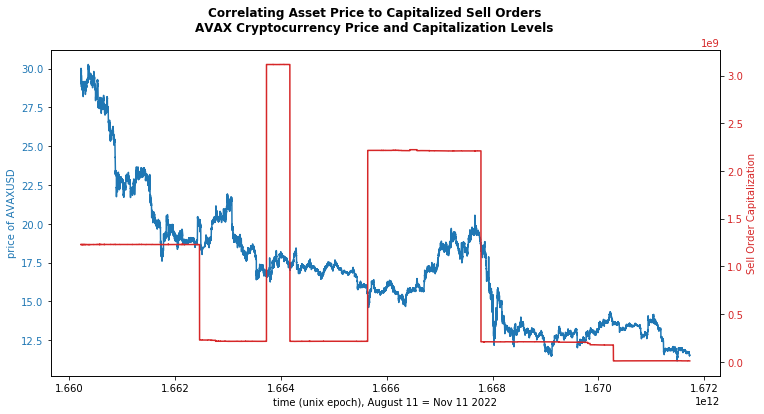

In [45]:
c = ['time', 'mp', 'ac']
ga =endFrame[c].sort_values(by=['time'])
t = ga['time']
data1 = ga['mp']
data2 = ga['ac']
   
fig, ax1 = plt.subplots()
   
color = 'tab:blue'
ax1.set_xlabel('time (unix epoch), August 11 = Nov 11 2022')
ax1.set_ylabel('price of AVAXUSD', color = color)
ax1.plot(t, data1, color = color)
ax1.tick_params(axis ='y', labelcolor = color)
   
ax2 = ax1.twinx()
   
color = 'tab:red'
ax2.set_ylabel('Sell Order Capitalization', color = color)
ax2.plot(t, data2, color = color)
ax2.tick_params(axis ='y', labelcolor = color)
  
fig.suptitle('Correlating Asset Price to Capitalized Sell Orders\n\
AVAX Cryptocurrency Price and Capitalization Levels\n', fontweight ="bold")
fig.set_figwidth(12)
fig.set_figheight(6)
plt.show()

In [46]:
diff = end - start
print(diff)

11505092531


# Step Two: Import Economic Indicators
Governments release data on their economic progress daily. Other third party entities, such as the United States Institute for Supply Chain Management, or ISM also release meaningful economic indicators. Institutions like the University of Michigan are included in this survey of impactful economic indicators, as they release a monthly statement of Consumer Confidence. 

Releases of economic indicators tend to create ripples upon markets. In our study, records of 53 indicator releases are captured. 

Traders tend to position themselves before an economic indicator, to reap potential benefits from the release. Thus, the order book data should reveal changes in capitalization, as the news breaks. Pessimism in the economic indicator shows up in the decline of buy or sell capitalization. 

In [47]:
def getIndicators():
    return pd.read_csv("usIndicatorsFall22-fulls.csv")

## Which indicators will be analyzed, for their impact on markets?

In [8]:
aiFrame = getIndicators()
print(aiFrame.columns)
print(aiFrame['indicator'].unique())

Index(['date', 'time', 'indicator', 'actual', 'previous', 'consensus',
       'forecast'],
      dtype='object')
['ism manufacturing pmi' 'jolts job openings' 'ism non manufacturing pmi'
 'balance of trade' 'non farm payrolls' 'core inflation rate'
 'inflation rate yoy' 'ppi mom' 'michigan consumer sentiment pref'
 'building permits' 'retail sales mom' 'fomc minutes'
 'durable goods orders mom' 'personal income mom' 'personal spending mom'
 'fed chair powell speech' 'fomc economic projections'
 'fed press conference' 'core inflation rate yoy' 'buildling permits'
 'Non Farm Payrolls']


In [48]:
listInd = aiFrame['indicator'].unique()

#### Use the unique set of indicators
Iterate the set of indicators

In [49]:
listInd
for i in range(len(listInd)):
    iDF = aiFrame[aiFrame['indicator']==listInd[i]]
#     print(iDF)

## Challenge: integrate economic indicator data set with orderbook data
A common key of date will help integrate the economic indicators with the numerous order book entries. 

However, the format of dates in the economic indicator announcements is human readable date-time. The order book data is stored as UNIX epoch. 

While iterating the economic indicators, the dates must be transformed so that we may fetch capitalization data associated with the announcement. 

In [55]:
from dateutil import parser
import datetime
import time

def convertIndicatorDateToEpoch(original):
    re =datetime.datetime.strptime(original, "%a %b %d %I:%M %p %Y")
    ep = time.mktime(re.timetuple()) * 1000   
    return ep

## The date of each announcement must be translated into a UNIX timestamp
The UNIX timestamp must then be formatted into the python version of the epoch, which is a 13 number value. Given the fact that most of the order book values were written by a UNIX system, their dates appear with only 10 values. 

We make up for this discrepancy by adding three zeroes to the end of each date, which enables the announcements to correlate to market events. However, the distance of the three zeroes tends to create a ten minute difference between the release of the indicators, and the exact market events. 

In [54]:
def getFullIADates():
    indicatorData = getIndicators()
    result = []
    for row, val in indicatorData.iterrows(): 
        s1 = val['date'].replace(','  , '')
        ss = s1.split(" ")
        day  = ss[0][0:3]
        mon = ss[1][0:3]
        num = ss[2]
        hr = val['time']
        if int(num) <10:
            num = "0"+num
        yr = ss[3]
        l = day + " " + mon + " " + num #+ " " + hr
        extendedDateTime = day + " " + mon + " " + num + " " + hr + " " +yr
        IaDict = { "dictDF":val, "epochForIA":convertIndicatorDateToEpoch( extendedDateTime)} #get the data for the indicator row, then the epoch date
        result.append( IaDict)     
    return result

## Crucial study: isolate 1,000 price events before and after an announcement, and capture capitalized metaorders

Now that capitalization data synchronizes with announcement times, a picture of market activity before and after the event emerges. 

 Initially, the top correlated pairs are located. Then, I will gather the correlation between AC, BC and MP at two different times: before and after an announcement.

In [57]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]  #[0:n]

## Delivering Capitalization Flows, before and after the announcement

For each announcement, the before and after flows of money are captured, and organized around each event. 

In [61]:
def getIaDateAndGetCAPS():
    fullIaRunDown = getFullIADates() 
    allCapsArray =[]    
    for i in fullIaRunDown:
        iaDFpre =  endFrame[endFrame["time"]< int(i["epochForIA"])].head(1000)  #rows one day before the announcement
        iaDFpost = endFrame[endFrame["time"]> i["epochForIA"]].head(1000)  #rows one day before the announcement
        preDictionary = deliverKeyStatsPrePost(iaDFpre, "pre") 
        postDictionary = deliverKeyStatsPrePost(iaDFpost, "post")
        dictP ={"IAEpoch":i['epochForIA'], "indicatorInfo":i['dictDF'], \
               "preDictionary":preDictionary, "postDictionary":postDictionary} #indicator info, name and associated rows of caps
        allCapsArray.append(dictP)
    return allCapsArray    
getIaDateAndGetCAPS()

[{'IAEpoch': 1659333600000.0,
  'indicatorInfo': date         Monday, August 1, 2022
  time                        6:00 AM
  indicator     ism manufacturing pmi
  actual                         52.8
  previous                         53
  consensus                        52
  forecast                       52.2
  Name: 0, dtype: object,
  'preDictionary': None,
  'postDictionary': {'rise': 1.0199999999999996,
   'run': -537,
   'slope': -526.4705882352944,
   'area': -273.8699999999999,
   'cm': ac  mp    0.978169
   bc  ac    0.040840
       mp    0.016615
   dtype: float64}},
 {'IAEpoch': 1659420000000.0,
  'indicatorInfo': date         Tuesday, August 2, 2022
  time                         6:00 AM
  indicator         jolts job openings
  actual                        10.698
  previous                      11.303
  consensus                         11
  forecast                          11
  Name: 1, dtype: object,
  'preDictionary': None,
  'postDictionary': {'rise': 1.0199999999999

## caps4IA: a dataframe of capitalization before and after an announcement

In [16]:
caps4IA = getIaDateAndGetCAPS()
print(len(caps4IA))

53


In [17]:
capsDF = pd.DataFrame(caps4IA)

In [18]:
capsDF.columns

Index(['IAEpoch', 'indicatorInfo', 'preDictionary', 'postDictionary'], dtype='object')

## Counting Instances of Capitalization pre, and post announcement 
For each announcement, correlation matrix, locate the top most correlated two variables, before and after the announcement.

In [59]:
collect = []
for row1, val1 in capsDF.iterrows():
    if val1['preDictionary'] is not None:  
        pairString = str(val1['preDictionary']['cm'].iloc[:1])
        pairString.split(" ")
        correlatePair = pairString[0:2]+"|"+pairString[4:6]
        pkg=dict(pair=correlatePair, \
                 correlate1=pairString[0:2], \
                 correlate2=pairString[4:6],\
                 corrCoeff=val1['preDictionary']['cm'].iloc[0],\
                             announcementName=val1['indicatorInfo']['indicator'],\
                      date=val1['indicatorInfo']['date'], type="pre")
        collect.append(pkg)
preDF = pd.DataFrame(collect)            

In [20]:
preDF.head(2)

pair correlate1 correlate2  corrCoeff                  announcementName  \
0  bc|ac         bc         ac   0.803435  michigan consumer sentiment pref   
1  bc|mp         bc         mp   0.893323                  building permits   

                       date type  
0   Friday, August 12, 2022  pre  
1  Tuesday, August 16, 2022  pre

## Collect the most correlated pair of factors

In [63]:
collectPost = []
for row1, val1 in capsDF.iterrows():
    if val1['postDictionary'] is not None:  
        pairString = str(val1['postDictionary']['cm'].iloc[:1])
        pairString.split(" ")
        correlatePair = pairString[0:2]+"|"+pairString[4:6]
        pkg=dict(pair=correlatePair, \
                 correlate1=pairString[0:2], \
                 correlate2=pairString[4:6],\
                 corrCoeff=val1['postDictionary']['cm'].iloc[0],\
                             announcementName=val1['indicatorInfo']['indicator'],\
                      date=val1['indicatorInfo']['date'], type="pre")
        collectPost.append(pkg)
postDF = pd.DataFrame(collectPost)            

## After Economic Announcements, correlation between sell and buy orders
Compare the degrees of correlation between ask capitalization, buy capitalization and the midpoint price.

Contrast these correlation statistics before and after an economic announcement.

In [23]:
collectMPCorrelates = []
for row1, val1 in capsDF.iterrows():
    sortable= []
    if val1['postDictionary'] is not None:  
        for row, val in val1['postDictionary']['cm'].items():
            rowrep = row[0]+"|"+row[1]
            results = dict(couplet=rowrep, \
                           coef=val, \
                          indicator=val1['indicatorInfo']['indicator'],\
                          date=val1['indicatorInfo']['date'],\
                          time=val1['indicatorInfo']['time'])
            collectMPCorrelates.append(results)
acbcMPDFPost = pd.DataFrame(collectMPCorrelates)            

In [24]:
acbcMPDFPost.head(2)

couplet      coef              indicator                    date     time
0   ac|mp  0.978169  ism manufacturing pmi  Monday, August 1, 2022  6:00 AM
1   bc|ac  0.040840  ism manufacturing pmi  Monday, August 1, 2022  6:00 AM

In [25]:
acbcMPDFPost[acbcMPDFPost['couplet']=='ac|mp'][ 'coef'].mean()

0.978169124522928

In [26]:
acbcMPDFPost[acbcMPDFPost['couplet']=='bc|mp'][ 'coef'].mean()

0.016615344869515127

In [27]:
print("POST ANNOUNCEMENT CORRELATION OF BUY AND SELL CAPITALIZATION TO PRICE")
print("SELL CAP, POST ANNOUNCEMENT:", acbcMPDFPost[acbcMPDFPost['couplet']=='ac|mp'][ 'coef'].mean())
print("BUY  CAP, POST ANNOUNCEMENT:", acbcMPDFPost[acbcMPDFPost['couplet']=='bc|mp'][ 'coef'].mean())

POST ANNOUNCEMENT CORRELATION OF BUY AND SELL CAPITALIZATION TO PRICE
SELL CAP, POST ANNOUNCEMENT: 0.978169124522928
BUY  CAP, POST ANNOUNCEMENT: 0.016615344869515127


## Correlation between buy and sell orders, before economic indicator announcement

In [28]:
collectMPCorrelatesPre = []
for row1, val1 in capsDF.iterrows():
    sortable= []
    if val1['preDictionary'] is not None:  
        for row, val in val1['preDictionary']['cm'].items():
            rowrep = row[0]+"|"+row[1]
            results = dict(couplet=rowrep, \
                           coef=val, \
                          indicator=val1['indicatorInfo']['indicator'],\
                          date=val1['indicatorInfo']['date'],\
                          time=val1['indicatorInfo']['time'])
            collectMPCorrelatesPre.append(results)
acbcMPDFPre = pd.DataFrame(collectMPCorrelatesPre)            

In [29]:
acbcMPDFPre.head(2)

couplet      coef                         indicator  \
0   bc|ac  0.803435  michigan consumer sentiment pref   
1   bc|mp  0.564164  michigan consumer sentiment pref   

                      date     time  
0  Friday, August 12, 2022  6:00 AM  
1  Friday, August 12, 2022  6:00 AM

## pre announcement sell order capitalization, correlation to price

In [30]:
acbcMPDFPre[acbcMPDFPre['couplet']=='ac|mp'][ 'coef'].mean()

0.7451723916287843

## pre announcement buy order capitalization, correlation to price

In [31]:
acbcMPDFPre[acbcMPDFPost['couplet']=='bc|mp'][ 'coef'].mean()

0.09084264336762436

## Pre Announcement, Mean Correlation Coefficients, buy vs sell order capitalization

In [32]:
print("MEAN SELL ORDER CAP CORRELATION, BEFORE ANNOUNCEMENT\t\t",\
acbcMPDFPre[acbcMPDFPre['couplet']=='ac|mp'][ 'coef'].mean())
print("MEAN BUY ORDER CAP CORRELATION TO PRICE, BEFORE ANNOUNCEMENT\t",\
acbcMPDFPre[acbcMPDFPost['couplet']=='bc|mp'][ 'coef'].mean())

MEAN SELL ORDER CAP CORRELATION, BEFORE ANNOUNCEMENT		 0.7451723916287843
MEAN BUY ORDER CAP CORRELATION TO PRICE, BEFORE ANNOUNCEMENT	 0.09084264336762436


notes, in the fall, sell order capitalization was 75% correlated to the price, whereas buy order capitalization was 9% correlated to price, both before and after announcements. 

## study topmost correlated pairs, by dataframe

In [33]:
postDF.head(2) #takes topmost correlated pairs, not necessarity mp

pair correlate1 correlate2  corrCoeff       announcementName  \
0  ac|mp         ac         mp   0.978169  ism manufacturing pmi   
1  ac|mp         ac         mp   0.978169     jolts job openings   

                      date type  
0   Monday, August 1, 2022  pre  
1  Tuesday, August 2, 2022  pre

## Visualizing Buy and Sell Orders Before and After Economic Announcements

In [34]:
preDF.columns

Index(['pair', 'correlate1', 'correlate2', 'corrCoeff', 'announcementName',
       'date', 'type'],
      dtype='object')

In [35]:
title = alt.TitleParams('Before Economic Annoucenements, Fall 2022, Flow of Fund Correlations ', anchor='middle')

alt.Chart(preDF, title=title).mark_circle(size=300).encode(
x="pair", y="corrCoeff", color="pair", size="corrCoeff", tooltip=['pair', 'corrCoeff']
).properties(width=700, height=350).interactive()

alt.Chart(...)

## Comparing Percentages of pairs in pre-announcement markets

In [36]:
preDF[preDF['pair']=="bc|ac"]['corrCoeff'].mean()

0.6141584181868804

In [37]:
countBCAC = preDF[preDF['pair']=="bc|ac"]["pair"].count()
countBCAC

8

In [38]:
preDF[preDF['pair']=="ac|mp"]['corrCoeff'].mean()

0.9520862781557476

In [39]:
countACMP = preDF[preDF['pair']=="ac|mp"]["pair"].count()
countACMP

32

In [40]:
countBCMP = preDF[preDF['pair']=="bc|mp"]["pair"].count()
countBCMP

5

In [41]:
preDF[preDF['pair']=="bc|mp"]['corrCoeff'].mean()

0.8070983349484078

## Odds of Correlated Pairs in Pre-Announcement Capitalization
During the predominantly fall season of our study, the correlation between sell order capitalization and price achieved near parity, at 95%. 

The correlation of price to buy order capitalization was 80%. 

Meanwhile, the correlated order flows between buy and sell were correlated at 61%. 

## Capitalization in post-annoucement markets

In [42]:
title2 = alt.TitleParams('After Economic Annoucenements, Fall 2022, Flow of Fund Correlations ', anchor='middle')

alt.Chart(postDF, title=title2).mark_circle(size=300).encode(
x="pair", y="corrCoeff", color="pair", size="corrCoeff", tooltip=['pair', 'corrCoeff']
).properties(width=700, height=350).interactive()

alt.Chart(...)

In [43]:
postDF[postDF['pair']=="ac|mp"]['corrCoeff'].mean()

0.978169124522928

## Odds of Correlated Pairs in Pre-Announcement Capitalization
Within one day of the economic announcements, the correlation between sell orders and the mid point price rate was correlated to 97%. 

Thus, pricing and sell orders, post announcement, are tightly associated in this fall season. 